## First: ##

 - grab our dependencies

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # converting timestamp to date
import seaborn as sns # Visualizer for data
import matplotlib.pyplot as plt # matplot
import matplotlib.dates as mdates # for plotting dates
%matplotlib inline
from subprocess import check_output
# What are we working with?
print('File: \n', check_output(["ls", "./input"]).decode("utf8"))

File: 
 address.csv
all_data.csv
blocksize.csv
etherprice.csv
ethersupplygrowth.csv
hashrate.csv
marketcap.csv
tx.csv



## Take the CSVs one at a time and create a DataFrame for each of them ##

In [30]:
# Chances are I wont get to all of them so you can comment out the ones you dont want
address = pd.read_csv('./input/address.csv')
blocksize = pd.read_csv('./input/blocksize.csv')
etherprice = pd.read_csv('./input/etherprice.csv')
hashrate = pd.read_csv('./input/hashrate.csv')
marketcap = pd.read_csv('./input/marketcap.csv')
tx = pd.read_csv('./input/tx.csv')

## Converts the timestamp to readable data ##

In [31]:
# the timestamp in the method is a dataframe column
# it returns a list of the format which can then be ploted if needed
def timeConvert(timestamps):
    timeValue = list(range(len(timestamps)))
    for i in range(len(timestamps)):
        timeValue[i] = (dt.datetime.fromtimestamp(timestamps[i]).strftime('%Y-%m-%d'))
    return timeValue;


In [ ]:
eth = etherprice
eth['date-time'] = pd.DataFrame(timeConvert(etherprice['date-time']))
# comment out above if you want to use timestamp
eth.head()

In [26]:
def plotit(data):
    # makes numpy array
    r = data.values.view(np.recarray)
    #grab y-datas
    df = r[:,1]
    #crops to dates
    r = r[:,0]
    # to datetime
    r = pd.to_datetime(r)
    # make new plots
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.plot(r, df)
    ax.grid(False)
    # matplotlib date format object
    hfmt = mdates.DateFormatter('%Y - - %m')
    # format the ticks
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(hfmt)
    # format the coords message box
    def yvals(x):
        return '$%1.2f' % x
    ax.format_xdata = hfmt
    ax.format_ydata = yvals
    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()
    plt.show()

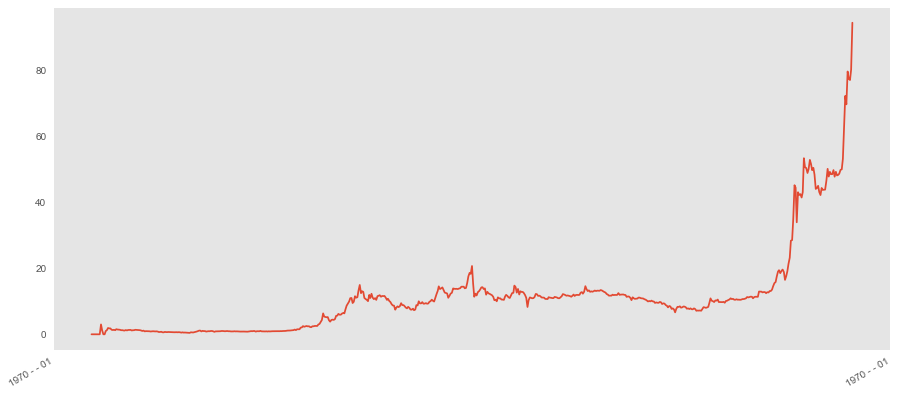

In [32]:
plotit(eth)

## Alright looks ok, we can do more detail ##

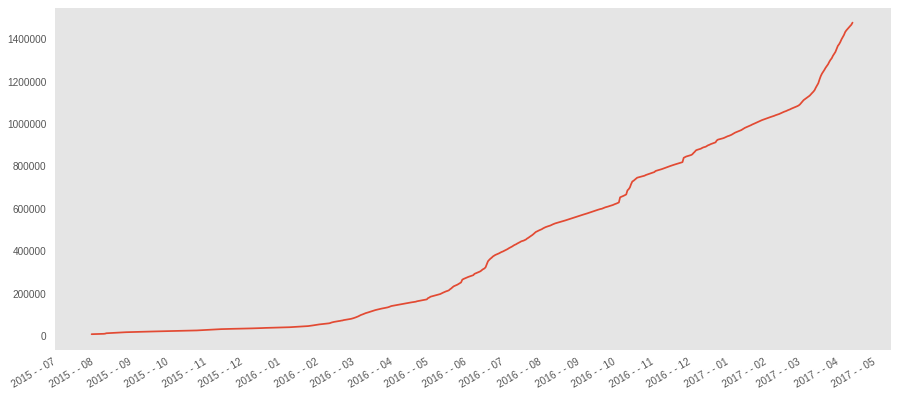

In [9]:
add = address
add['date-time']=pd.DataFrame(timeConvert(address['date-time']))
plotit(add)

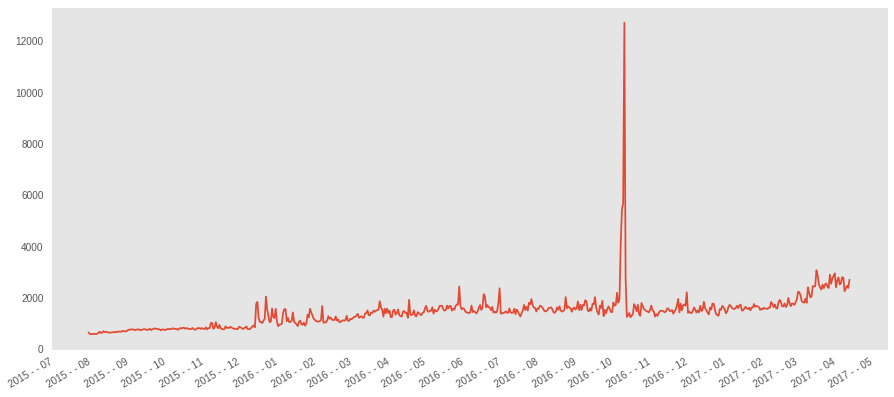

In [10]:
blocks = blocksize
blocks['date-time']=pd.DataFrame(timeConvert(blocksize['date-time']))
plotit(blocks)

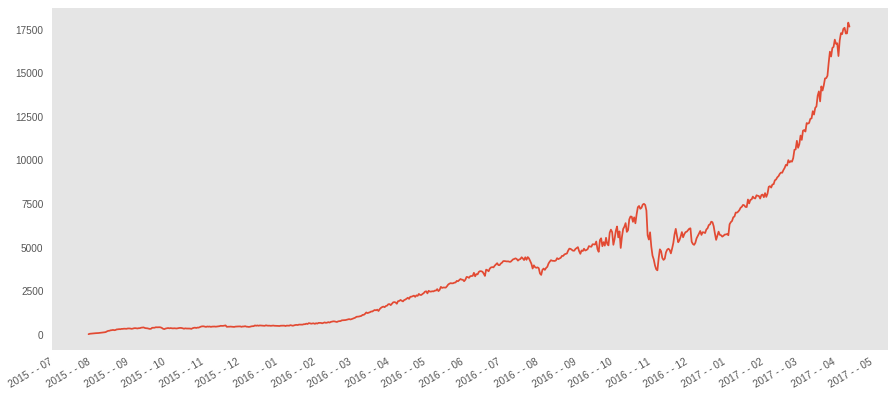

In [11]:
hashes = hashrate
hashes['date-time']=pd.DataFrame(timeConvert(hashrate['date-time']))
plotit(hashes)

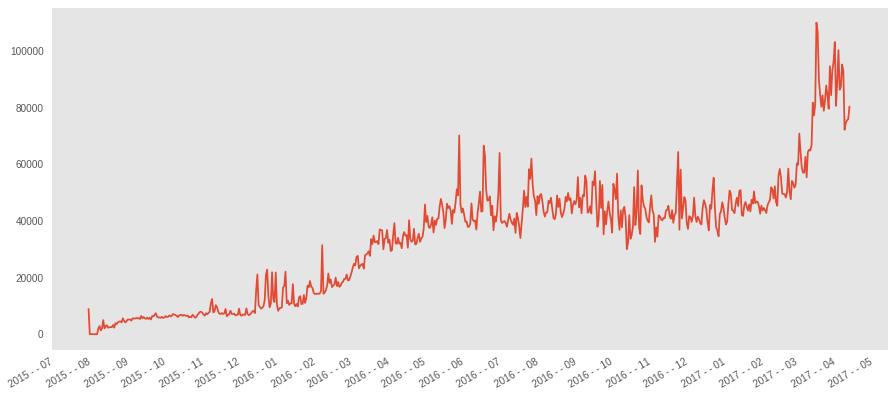

In [12]:
txs = tx
txs['date-time']=pd.DataFrame(timeConvert(tx['date-time']))
plotit(txs)

# This is pretty simple... lets go a bit deeper

In [15]:
tx['date-time'] = pd.to_datetime(tx['date-time'])
tx.info()
txs['date-time'] = txs['date-time'].dt.year
txs = txs.groupby('date-time')['amt-transactions-on-day'].apply(lambda x: (x.unique().sum()))
txs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 2 columns):
date-time                  623 non-null datetime64[ns]
amt-transactions-on-day    623 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 9.8 KB


date-time
2015     1056626
2016    13531027
2017     6217333
Name: amt-transactions-on-day, dtype: int64

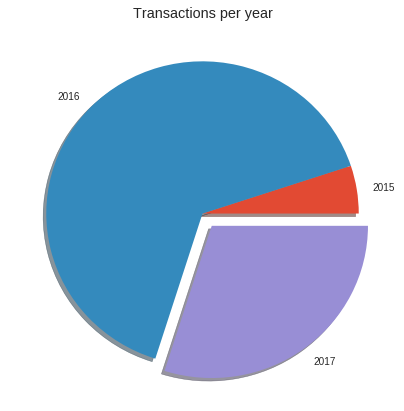

In [16]:
fig, ax = plt.subplots(figsize=(7, 7))
shap = txs
labels = '2015','2016','2017'
explode = (0, 0, 0.1)
ax.pie(shap, explode=explode, labels=labels, shadow=True)
plt.title('Transactions per year')
plt.show()

## O.K.! Now on to the price perdictions!

In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [2]:
# Load data
X_train, y_train, X_test, y_test = lstm.load_data('./input/ether.csv', 30, True)

In [3]:
# Build model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=30,
    return_sequences=True,))
model.add(Dropout(0.14))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.14))
model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('Compilation time: ', time.time()-start)

Compilation time:  0.010754108428955078


In [4]:
# Train model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=10,
    validation_split=0.05)

Train on 498 samples, validate on 27 samples
Epoch 1/10
498/498 [==============================] - 0s - loss: 0.6696 - val_loss: 1.0974
Epoch 2/10
498/498 [==============================] - 0s - loss: 0.4631 - val_loss: 0.8331
Epoch 3/10
498/498 [==============================] - 0s - loss: 0.3102 - val_loss: 0.5372
Epoch 4/10
498/498 [==============================] - 0s - loss: 0.1673 - val_loss: 0.3015
Epoch 5/10
498/498 [==============================] - 0s - loss: 0.1224 - val_loss: 0.4458
Epoch 6/10
498/498 [==============================] - 0s - loss: 0.1267 - val_loss: 0.2709
Epoch 7/10
498/498 [==============================] - 0s - loss: 0.1037 - val_loss: 0.3876
Epoch 8/10
498/498 [==============================] - 0s - loss: 0.1067 - val_loss: 0.2650
Epoch 9/10
498/498 [==============================] - 0s - loss: 0.0929 - val_loss: 0.3726
Epoch 10/10
498/498 [==============================] - 0s - loss: 0.0967 - val_loss: 0.2667


Amount preedicted:  58  with true data: 58 , and prediction length:  12


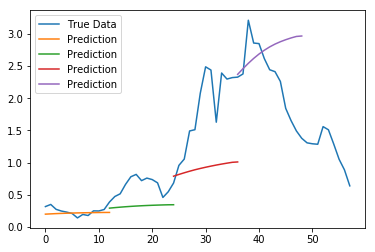

In [11]:
# Try to predict
predictions = lstm.predict_sequences_multiple(model, X_test, 11, 13)
lstm.plot_results_multiple(predictions, y_test, 12)

# Obviously not the best...